In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_shop = pd.read_csv("shopping_trends_updated1.csv")

In [3]:
df_shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df_shop.shape

(3900, 18)

In [5]:
df_shop.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [6]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df_shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
df_shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
print(f"The unique values of the 'Gender' column are: {df_shop['Gender'].unique()}")
print()
print(f"The unique values of the 'Category' column are: {df_shop['Category'].unique()}")
print()
print(f"The unique values of the 'Size' column are: {df_shop['Size'].unique()}")
print()
print(f"The unique values of the 'Subscription Status' column are: {df_shop['Subscription Status'].unique()}")
print()
print(f"The unique values of the 'Shipping Type' column are: {df_shop['Shipping Type'].unique()}")
print()
print(f"The unique values of the 'Discount Applied' column are: {df_shop['Discount Applied'].unique()}")
print()
print(f"The unique values of the 'Promo Code Used' column are: {df_shop['Promo Code Used'].unique()}")
print()
print(f"The unique values of the 'Payment Method' column are: {df_shop['Payment Method'].unique()}")

The unique values of the 'Gender' column are: ['Male' 'Female']

The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']

The unique values of the 'Subscription Status' column are: ['Yes' 'No']

The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the 'Discount Applied' column are: ['Yes' 'No']

The unique values of the 'Promo Code Used' column are: ['Yes' 'No']

The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


In [10]:
# 1.What is the overall distribution of customer ages in the dataset?

In [11]:
df_shop["Age"].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [12]:
df_shop["Age"].mean().round()

44.0

In [13]:
df_shop["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df_shop['Age_category'] = pd.cut(df_shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

In [90]:
fig = px.histogram(df_shop , y = 'Age' , x = 'Age_category')
fig.show()

In [16]:
# 2.How does the average purchase amount vary across different product categories?

In [17]:
df_shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [18]:
df_shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [19]:
# 3.Which gender has the highest number of purchases?

In [20]:
df_shop.groupby('Gender')['Purchase Amount (USD)'].sum()

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

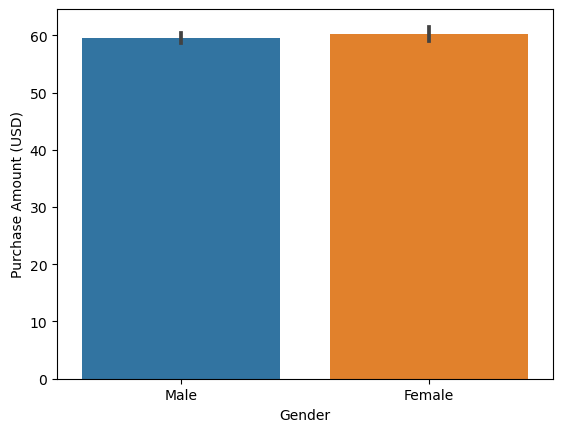

In [21]:
sns.barplot(df_shop , x = 'Gender' , y = 'Purchase Amount (USD)')

In [22]:
# 4.What are the most commonly purchased items in each category?

In [23]:
df_shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Sunglasses        161
             Belt              161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Pants             171
             Blouse            171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [24]:
fig = px.histogram(df_shop , x = 'Item Purchased' , color = 'Category')
fig.show()

In [25]:
# 5.Are there any specific seasons or months where customer spending is significantly higher?

In [26]:
df_shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [27]:
df_shop[df_shop['Season']=='Summer'].value_counts().sum()

955

In [28]:
df_shop[df_shop['Season']=='Spring'].value_counts().sum()

999

In [29]:
df_shop[df_shop['Season']=='Fall'].value_counts().sum()

975

In [30]:
df_shop[df_shop['Season']=='Winter'].value_counts().sum()

971

In [31]:
fig = px.histogram(df_shop , x = 'Season' , range_y= [200 , 1500] )
fig.show()

In [32]:
# 6.What is the average rating given by customers for each product category?

In [33]:
df_shop['Review Rating'].mean().round(2)

3.75

In [34]:
shop_groupby = df_shop.groupby('Category')['Review Rating'].mean().reset_index()
shop_groupby

,Category,Review Rating
0,Accessories,3.768629
1,Clothing,3.723143
2,Footwear,3.790651
3,Outerwear,3.746914


In [35]:
fig = px.bar(shop_groupby ,x= 'Category' , y = 'Review Rating' )
fig.show()

In [36]:
# 7.Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [37]:
df_shop['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

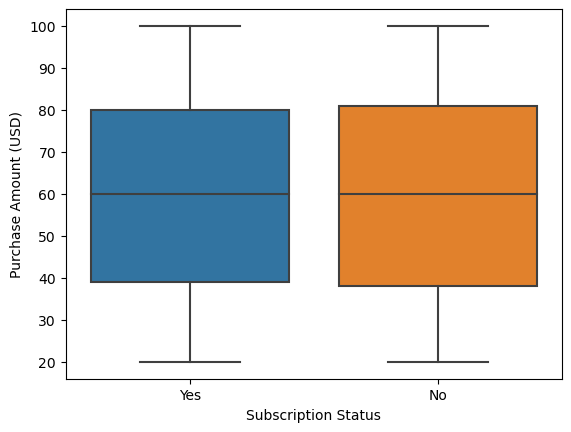

In [38]:
sns.boxplot(df_shop, x='Subscription Status', y='Purchase Amount (USD)')

In [39]:
df_shop['Purchase Amount (USD)'].sum()

233081

In [40]:
df_shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

In [41]:
# 8.Which payment method is the most popular among customers?

In [42]:
df_shop['Payment Method'].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [43]:
df_shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

In [44]:
shop_groupby = df_shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()
shop_groupby

,Payment Method,Purchase Amount (USD)
0,Bank Transfer,59.712418
1,Cash,59.704478
2,Credit Card,60.074516
3,Debit Card,60.915094
4,PayPal,59.245199
5,Venmo,58.949527


In [45]:
fig = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)')
fig.show()

<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

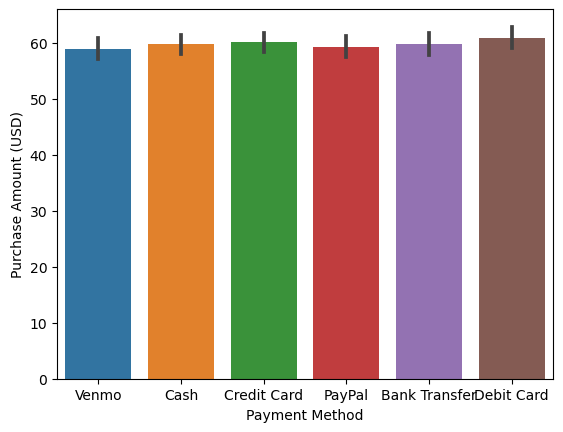

In [46]:
sns.barplot(df_shop ,x='Payment Method' , y = 'Purchase Amount (USD)')

In [47]:
# 9.Do customers who use promo codes tend to spend more than those who don't?

In [48]:
shop_groupby  = df_shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()
shop_groupby 

,Promo Code Used,Purchase Amount (USD)
0,No,133670
1,Yes,99411


In [49]:
fig = px.sunburst(df_shop , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

In [50]:
fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()

In [51]:
# 10.How does the frequency of purchases vary across different age groups?

In [52]:
df_shop[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [53]:
df_shop['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [54]:
shop_group = df_shop.groupby('Frequency of Purchases')['Age'].sum()
shop_group

Frequency of Purchases
Annually          25549
Bi-Weekly         23631
Every 3 Months    25350
Fortnightly       23624
Monthly           24489
Quarterly         25158
Weekly            24066
Name: Age, dtype: int64

In [55]:
px.sunburst(df_shop , path=['Frequency of Purchases','Age_category'] , values='Age')

In [56]:
# 11.Are there any correlations between the size of the product and the purchase amount?

In [57]:
shop_group = df_shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()
shop_group

,Size,Purchase Amount (USD)
0,L,61667
1,M,105167
2,S,40468
3,XL,25779


In [58]:
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

In [59]:
# 12.Which shipping type is preferred by customers for different product categories?

In [60]:
df_shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [61]:
df_shop['Shipping_Category'] = df_shop['Shipping Type'].map({'Express': 0, 'Free Shipping': 1, 'Next Day Air': 2,
                                                       'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5})
df_shop['Shipping_Category']

0       0
1       0
2       1
3       2
4       1
       ..
3895    4
3896    5
3897    3
3898    0
3899    5
Name: Shipping_Category, Length: 3900, dtype: int64

In [62]:
df_shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [63]:
df_shop['Category_num'] = df_shop['Category'].map({'Clothing':1, 'Footwear':2, 'Outerwear':3, 'Accessories':4})
df_shop['Category_num']

0       1
1       1
2       1
3       2
4       1
       ..
3895    1
3896    4
3897    4
3898    2
3899    4
Name: Category_num, Length: 3900, dtype: int64

In [64]:
# 13.How does the presence of a discount affect the purchase decision of customers?

In [65]:
shop_group = df_shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()
shop_group

,Discount Applied,Purchase Amount (USD)
0,No,133670
1,Yes,99411


In [66]:
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

In [67]:
fig = px.sunburst(df_shop , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')

fig.show()

In [68]:
# 14.Are there any specific colors that are more popular among customers?

In [69]:
px.histogram(df_shop , x = 'Color')

In [70]:
df_shop['Color'].value_counts().nlargest(5)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

In [71]:
# 15.What is the average number of previous purchases made by customers?

In [72]:
df_shop['Previous Purchases'].mean().round()

25.0

In [73]:
# 16.How does the purchase amount differ based on the review ratings given by customers?

In [74]:
df_shop.groupby('Location')['Purchase Amount (USD)'].mean().round().sort_values(ascending = False)

Location
Alaska            68.0
Arizona           67.0
Pennsylvania      67.0
West Virginia     64.0
North Dakota      63.0
Nevada            63.0
Washington        63.0
Virginia          63.0
Utah              63.0
Michigan          62.0
Tennessee         62.0
New Mexico        62.0
Wyoming           61.0
Massachusetts     61.0
North Carolina    61.0
Illinois          61.0
Iowa              61.0
Rhode Island      61.0
South Dakota      61.0
Texas             61.0
Arkansas          61.0
Mississippi       61.0
Ohio              60.0
New York          60.0
Montana           60.0
Idaho             60.0
Indiana           59.0
Nebraska          59.0
California        59.0
Georgia           59.0
Alabama           59.0
New Hampshire     59.0
Hawaii            58.0
South Carolina    58.0
Louisiana         58.0
Missouri          58.0
Oklahoma          58.0
Oregon            57.0
New Jersey        57.0
Vermont           57.0
Minnesota         57.0
Maine             57.0
Maryland          56.0
Ke

In [75]:
shop_group = df_shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
shop_group

,Location,Purchase Amount (USD)
0,Alabama,59.112360
1,Alaska,67.597222
2,Arizona,66.553846
3,Arkansas,61.113924
4,California,59.000000
5,Colorado,56.293333
6,Connecticut,54.179487
7,Delaware,55.325581
8,Florida,55.852941
9,Georgia,58.797468


In [76]:
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

In [77]:
# 17.Are there any noticeable differences in purchase behavior between different locations?

In [78]:
shop_group = df_shop.groupby('Category')['Age'].mean().reset_index()
shop_group

,Category,Age
0,Accessories,44.224194
1,Clothing,43.782959
2,Footwear,44.442404
3,Outerwear,44.311728


In [79]:
fig = px.bar(shop_group ,y = 'Age' , x= 'Category')
fig.show()

In [80]:
# 18.Is there a relationship between customer age and the category of products they purchase?

In [81]:
shop_group = df_shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
shop_group

,Gender,Purchase Amount (USD)
0,Female,75191
1,Male,157890


In [82]:
fig = px.bar(shop_group , x = 'Gender' , y = 'Purchase Amount (USD)')
fig.show()

In [83]:
px.sunburst(data_frame= df_shop , path = ['Gender' ,'Age_category'] , values='Purchase Amount (USD)')

In [84]:
# 19.How does the average purchase amount differ between male and female customers?

In [85]:
df_shop.groupby('Gender')['Purchase Amount (USD)'].mean()

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

In [86]:
Avg_purchase_amount_male =  df_shop[df_shop['Gender']=="Male"]['Purchase Amount (USD)'].mean().round(2)
Avg_purchase_amount_male

59.54

In [87]:
Avg_purchase_amount_female = df_shop[df_shop['Gender']=="Female"]['Purchase Amount (USD)'].mean().round(2)
Avg_purchase_amount_female

60.25

In [88]:
Avg_purchase_amount_difference =  Avg_purchase_amount_female - Avg_purchase_amount_male 
Avg_purchase_amount_difference.round(3)*100

71.0